In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat as loadmat
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

# Suppress warnings`
warnings.filterwarnings("ignore")

In [66]:
import imp

In [67]:
imp.reload(xy)

<module 'xy' from 'E:\\PyProject\\factors\\AD\\xy.py'>

In [2]:
import xy

# $因子描述：过去N日夏普（Risk-Adjusted Momentum）$

***计算方式：过去N天收益/过去N天收益标准差。***  

![示例](sample.jpg)

## 计算

In [92]:
index_ad11

,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,...,2023-08-15,2023-08-16,2023-08-17,2023-08-18,2023-08-21,2023-08-22,2023-08-23,2023-08-24,2023-08-25,2023-08-28
50,NaN,-0.519019,-0.284146,-0.611847,-0.370903,-0.559685,-0.460282,-0.487014,-0.361211,-0.468086,...,-0.122479,-0.166449,-0.139271,-0.224462,-0.313834,-0.222944,-0.312204,-0.218197,-0.191573,-0.058826
300,NaN,-0.622123,-0.305465,-0.636365,-0.387556,-0.572683,-0.462801,-0.511331,-0.344644,-0.446562,...,-0.165452,-0.218782,-0.177278,-0.268293,-0.364331,-0.265227,-0.368530,-0.277328,-0.297937,-0.166070
500,NaN,-0.947903,-0.376585,-0.706003,-0.480418,-0.680407,-0.586944,-0.674500,-0.419467,-0.511812,...,-0.235865,-0.303777,-0.201335,-0.325533,-0.409407,-0.324991,-0.440212,-0.372107,-0.454330,-0.297699
1000,NaN,-1.251432,-0.437230,-0.762601,-0.617121,-0.830639,-0.722211,-0.831354,-0.486111,-0.563479,...,-0.317193,-0.409903,-0.258498,-0.386133,-0.449322,-0.346654,-0.457681,-0.409966,-0.507504,-0.400907
sz100,NaN,-0.702140,-0.345726,-0.675745,-0.446894,-0.631780,-0.486874,-0.536680,-0.318258,-0.413867,...,0.158206,0.151306,0.144720,0.138432,0.132428,0.126694,0.121215,0.115981,0.110978,0.106196
kc50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.017882,-0.017120,-0.016391,-0.015693,-0.015025,-0.014385,-0.013773,-0.013186,-0.012625,-0.012087
2000,NaN,-1.263285,-0.417074,-0.741550,-0.571025,-0.782437,-0.691625,-0.792384,-0.480917,-0.562063,...,0.012783,0.012239,0.011718,0.011219,0.010741,0.010284,0.009846,0.009427,0.009026,0.008641


In [73]:
# 参数平滑
sts_ad11 = (xy.rets.T.ewm(11).mean() / xy.rets.T.ewm(11).std()).T
sts_ad12 = (xy.rets.T.ewm(12).mean() / xy.rets.T.ewm(12).std()).T
sts_ad13 = (xy.rets.T.ewm(13).mean() / xy.rets.T.ewm(13).std()).T
sts_ad14 = (xy.rets.T.ewm(14).mean() / xy.rets.T.ewm(14).std()).T
sts_ad15 = (xy.rets.T.ewm(15).mean() / xy.rets.T.ewm(15).std()).T

_sts_ad_mean = (sts_ad11+sts_ad12+sts_ad13+sts_ad14+sts_ad15)/5


In [91]:
# 参数平滑
index_ad11 = (xy.Index_rets.T.ewm(11).mean() / xy.Index_rets.T.ewm(11).std()).T
index_ad12 = (xy.Index_rets.T.ewm(12).mean() / xy.Index_rets.T.ewm(12).std()).T
index_ad13 = (xy.Index_rets.T.ewm(13).mean() / xy.Index_rets.T.ewm(13).std()).T
index_ad14 = (xy.Index_rets.T.ewm(14).mean() / xy.Index_rets.T.ewm(14).std()).T
index_ad15 = (xy.Index_rets.T.ewm(15).mean() / xy.Index_rets.T.ewm(15).std()).T

_sts_ad_mean = (index_ad11+index_ad12+index_ad13+index_ad14+index_ad15)/5

## 评估

### cl-cl

nan
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0


<Axes: >

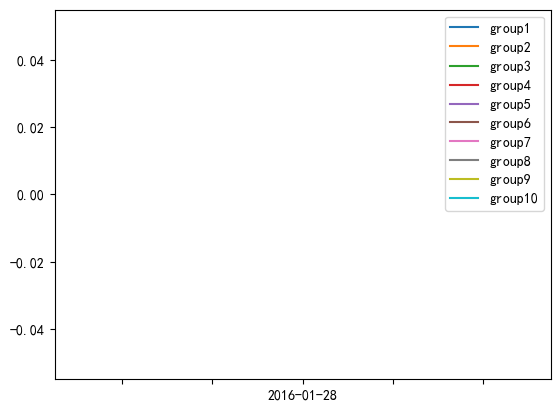

In [89]:
# 分组收益率
gr_ad_st = xy.cal_rate_group(
    _sts_ad_mean.loc[:,'2016-01-28':].shift(1,axis=1).loc[~_sts_ad_mean.index.isin(xy.weights1000.index|xy.weights500.index|xy.weights300.index|xy.weights50.index)],
    xy.rets.loc[:,'2016-01-28':],
    group_num=10,
    masks=1
)
gr_ad_st.cumsum().plot()

0.7050959009355227
1 263.48964745383324
2 263.91662003357584
3 263.8158925573587
4 264.0408505875769
5 264.0078343592613
6 263.7459429210968
7 263.9524342473419
8 263.90430889759375
9 263.8282036933408
10 264.39619473978735


<Axes: >

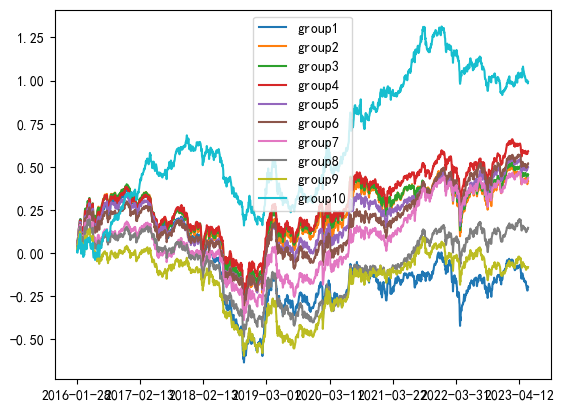

In [75]:
# 分组收益率
gr_ad_st = xy.cal_rate_group(
    _sts_ad_mean.loc[:,'2016-01-28':].shift(1,axis=1).loc[_sts_ad_mean.index.isin(xy.weights1000.index|xy.weights500.index|xy.weights300.index|xy.weights50.index)],
    xy.rets.loc[:,'2016-01-28':],
    group_num=10,
    masks=1
)
gr_ad_st.cumsum().plot()

0.7277578795991034
1 256.64857302742024
2 257.3094571908226
3 257.23614997202014
4 257.3312814773363
5 257.3676552881925
6 257.1818690542809
7 257.25909345271407
8 257.3083379966424
9 257.23726916620035
10 257.58254057078904


<Axes: >

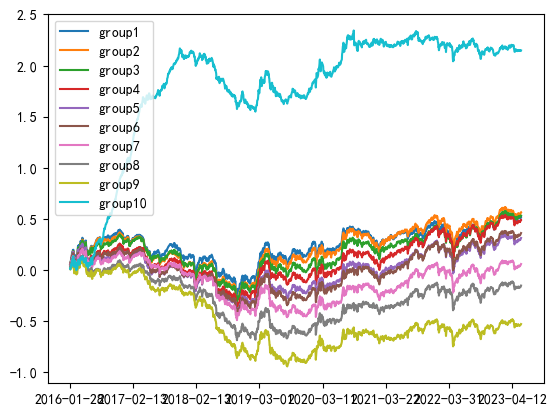

In [82]:
# 分组收益率
gr_ad_st = xy.cal_rate_group(
    _sts_ad_mean.loc[:,'2016-01-28':].dropna(axis=1,how='all').shift(1,axis=1)[(_sts_ad_mean.dropna(axis=1,how='all').shift(1,axis=1).rank()<4000)&(_sts_ad_mean.dropna(axis=1,how='all').shift(1,axis=1).rank()>1000)],
    xy.rets.loc[:,'2016-01-28':],
    group_num=10,
    masks=1
)
gr_ad_st.cumsum().plot()

In [95]:
sts_ad_mean = xy.read_Factor(xy.trd_dates,'sts_ad', df=_sts_ad_mean.dropna(axis=1,how='all').shift(1,axis=1))
sts_ad_mean1 = xy.read_Factor(xy.trd_dates,'sts_ad', df=_sts_ad_mean.dropna(axis=1,how='all').shift(1,axis=1))

,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-18,2016-01-19,...,2023-08-14,2023-08-15,2023-08-16,2023-08-17,2023-08-18,2023-08-21,2023-08-22,2023-08-23,2023-08-24,2023-08-25
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.014442,0.974070,0.656285,0.678107,0.542107,-0.746125,-1.034092,-1.212360,-1.244392,-1.277796
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.592020,0.608434,0.378808,0.356793,0.415014,-0.158201,0.046787,-0.317752,0.609457,0.617895
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.396994,-0.328200,0.454587,0.451405,0.540224,1.454502,1.342499,1.124635,0.980219,0.949510
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.209468,-1.254305,-1.489680,-1.486305,-1.497345,-0.550176,-0.355194,0.405477,-0.345285,-0.289610


0.04457051547043774
1 0.9994577006507592
2 0.9994577006507592
3 0.9994577006507592
4 0.9994577006507592


<Axes: >

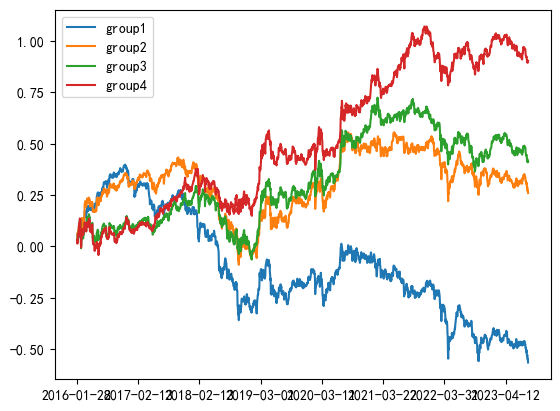

In [100]:
# 分组收益率
gr_ad = xy.cal_rate_group(
    _sts_ad_mean.loc[['50', '300', '500', '1000'],'2016-01-28':].shift(1,axis=1),
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-28':],
    group_num=4,
    masks=1
)
gr_ad.cumsum().plot()

0.052305913741246136
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

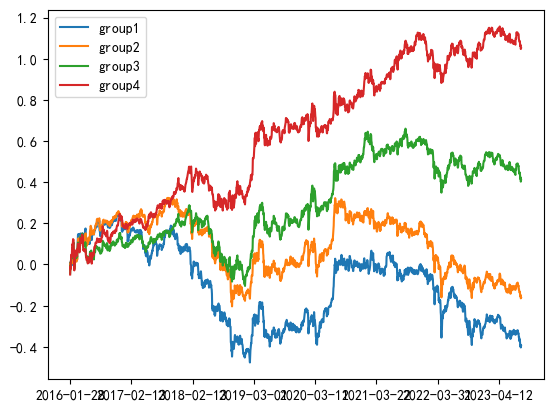

In [63]:
# 分组收益率
gr_ad = xy.cal_rate_group(
    sts_ad_mean1.loc[['50', '300', '500', '1000'],'2016-01-28':],
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-28':],
    group_num=4,
    masks=1
)
gr_ad.cumsum().plot()

1232.0
yoy: 0.20013509619631448 
 mdd: -0.3615026410813469 
 sharpe: 1.1322606474055068 
 rankIC: 0.0363537710255019 
 rankIR: 0.046798808937679376 
 win%: 0.5233188720173536 
 gain_loss%: -1.1100079397196698


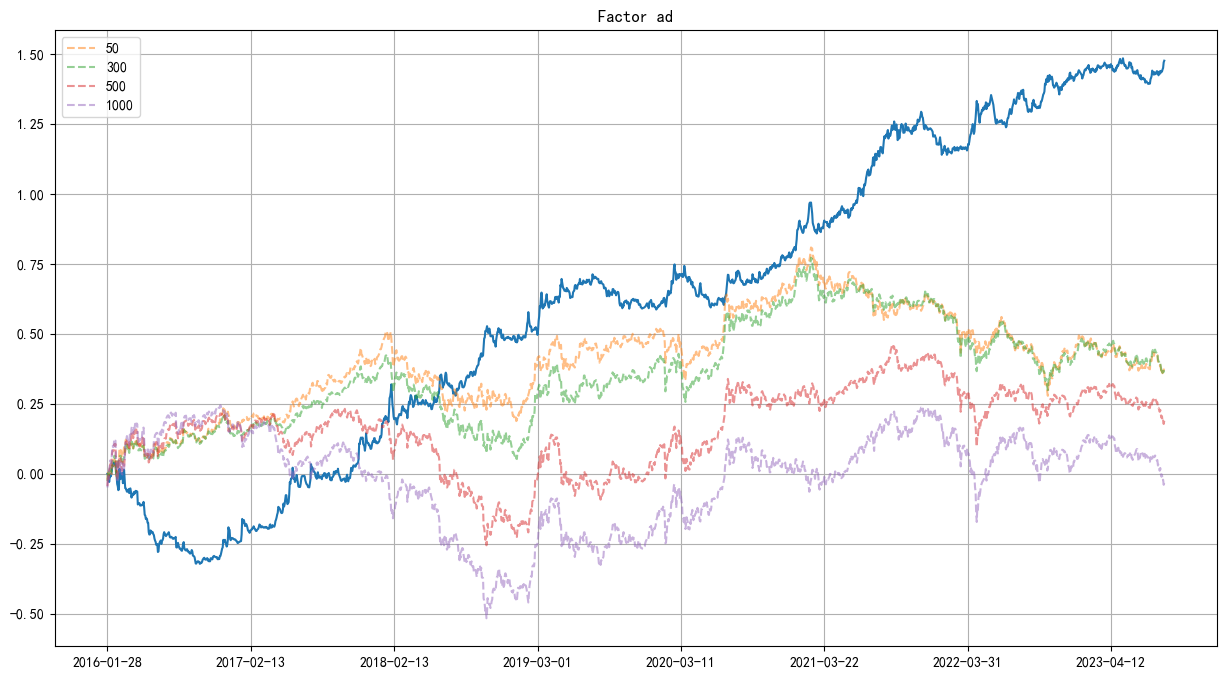

In [101]:
# 单因子强弱
ad_select1, ad_rets1 = xy.single_Factor_backtest(
    
    _sts_ad_mean.loc[['50', '300', '500', '1000'],'2016-01-28':].shift(1,axis=1),
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-28':],
    _side=1,
    fee=0.00,
    name='ad'
)

674.0
yoy: 0.1919341386500088 
 mdd: -0.2557287728006111 
 sharpe: 0.977582293747054 
 rankIC: 0.040694519804666304 
 rankIR: 0.040717206725326284 
 win%: 0.5203472599023331 
 gain_loss%: -1.0870401804713352


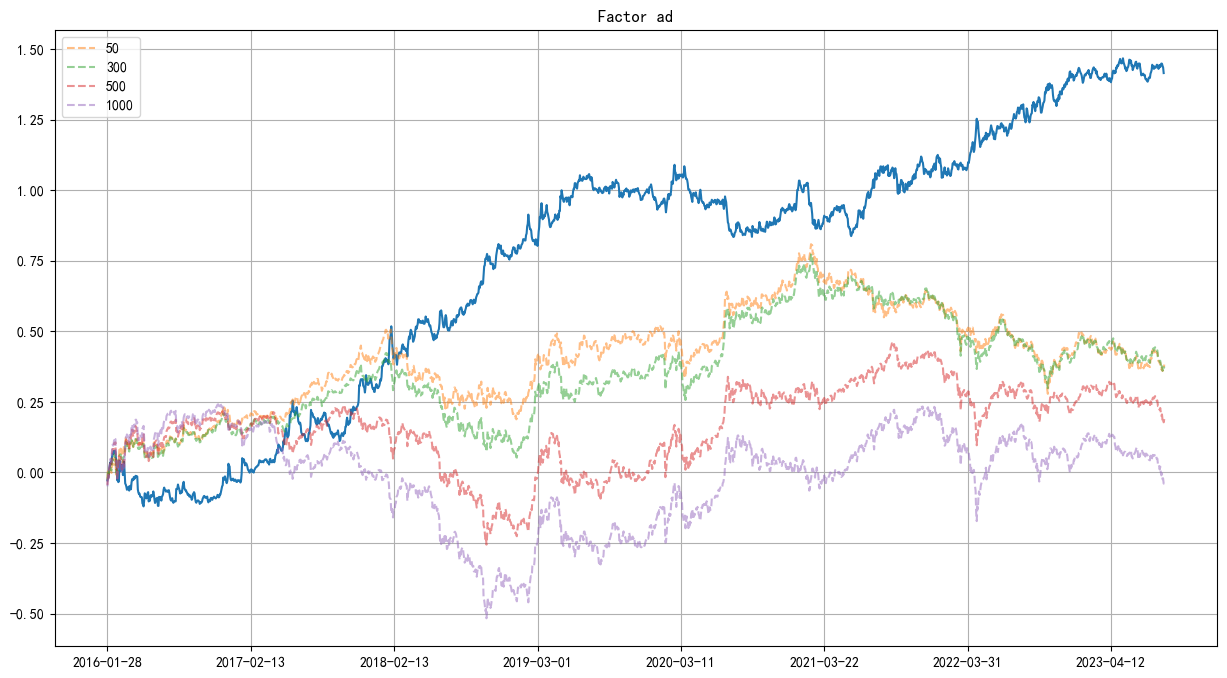

In [60]:
# 单因子强弱
ad_select1, ad_rets1 = xy.single_Factor_backtest(
    
    sts_ad_mean1.T.rolling(1).mean().T.loc[['50', '1000'],'2016-01-28':],
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-28':],
    _side=1,
    fee=0.00,
    name='ad'
)

866.0
yoy: 0.16895938425869575 
 mdd: -0.2108892935399258 
 sharpe: 0.8601943111890112 
 rankIC: 0.04720564297341291 
 rankIR: 0.04724550415067628 
 win%: 0.5236028214867064 
 gain_loss%: -1.0519011776073584


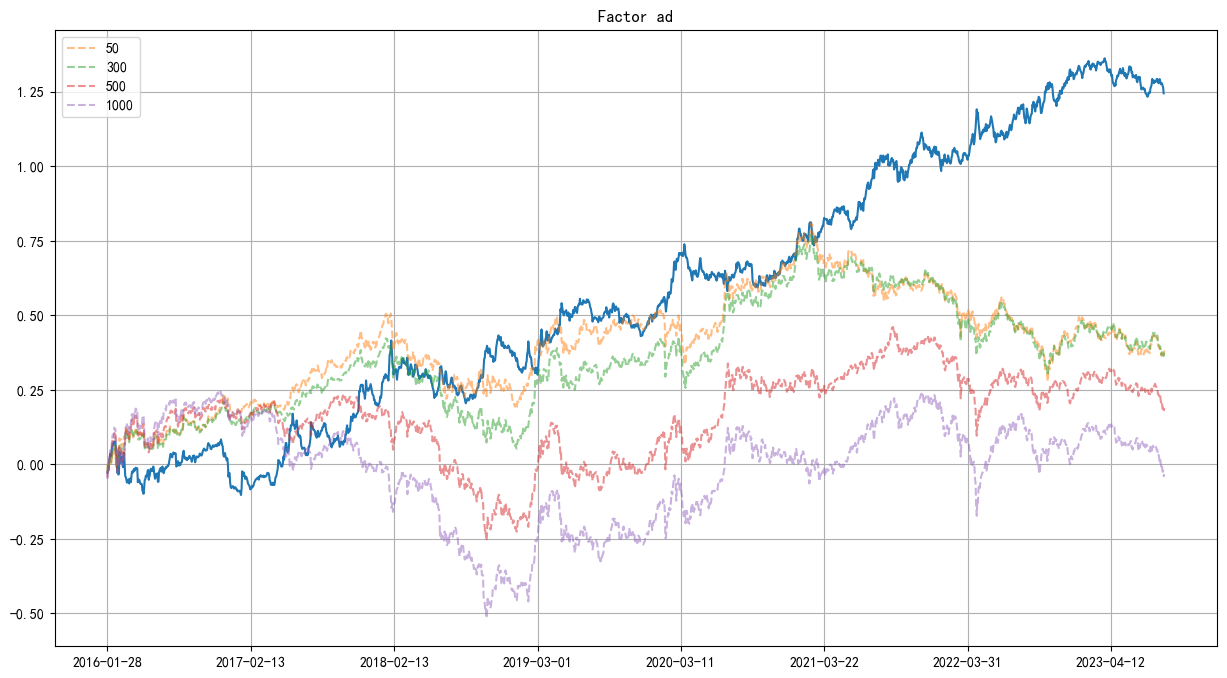

In [61]:
# 单因子强弱
ad_select, ad_rets = xy.single_Factor_backtest(
    
    sts_ad_mean.T.rolling(1).mean().T.loc[['50', '1000'],'2016-01-28':],
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-28':],
    _side=1,
    fee=0.00,
    name='ad'
)

In [8]:
std_down_diff = xy.cl.loc['300',:].pct_change().rolling(250).std().loc['2006-04-30':].dropna().rolling(10).mean() - xy.cl.loc['300',:].pct_change().rolling(250).std().loc['2006-04-30':].dropna().rolling(60).mean()

In [9]:
std_down_diff

2006-05-08         NaN
2006-05-09         NaN
2006-05-10         NaN
2006-05-11         NaN
2006-05-12         NaN
                ...   
2023-07-31   -0.000230
2023-08-01   -0.000200
2023-08-02   -0.000176
2023-08-03   -0.000146
2023-08-04   -0.000119
Name: 300, Length: 4199, dtype: float64

In [7]:
ad_rets

2016-01-28   -0.028139
2016-01-29    0.008598
2016-02-01    0.005600
2016-02-02    0.022068
2016-02-03    0.015937
                ...   
2023-07-31         NaN
2023-08-01         NaN
2023-08-02         NaN
2023-08-03         NaN
2023-08-04         NaN
Length: 1828, dtype: float64

0.049485714285714286

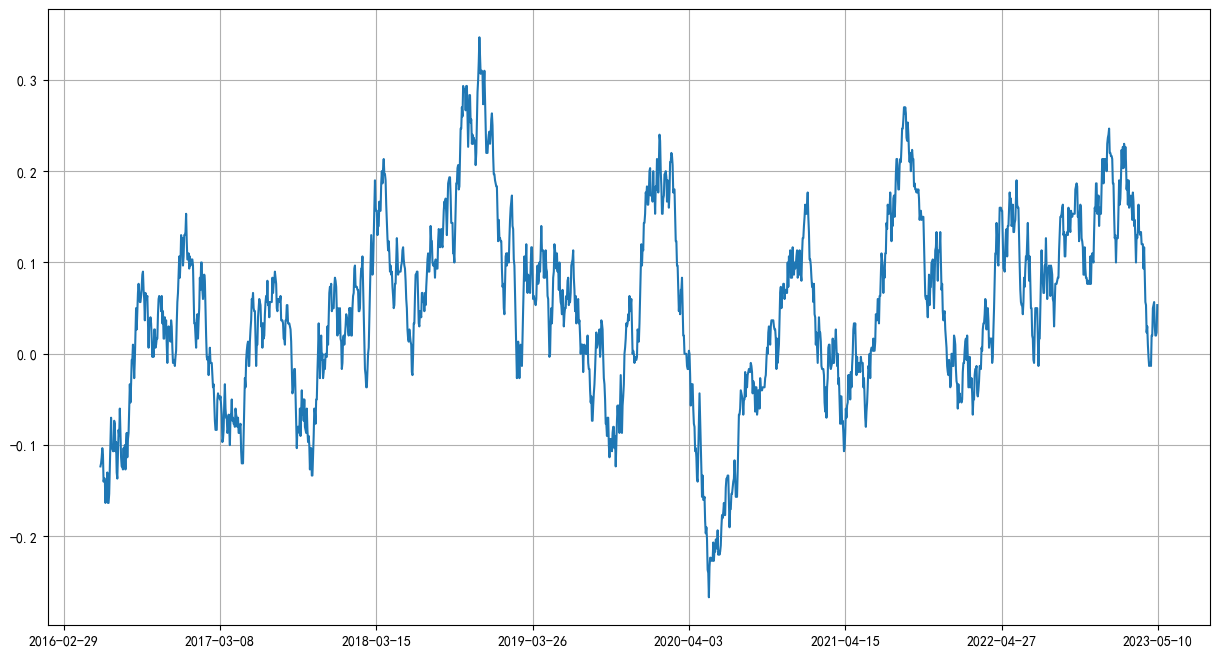

In [32]:
# 因子截面IC趋势
rankIC = xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False).corrwith(sts_ad_mean.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False))
rankIC.rolling(60).mean().plot(figsize=(15,8),grid=1)
rankIC.mean()

### cl_op

0.025582253338952733
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

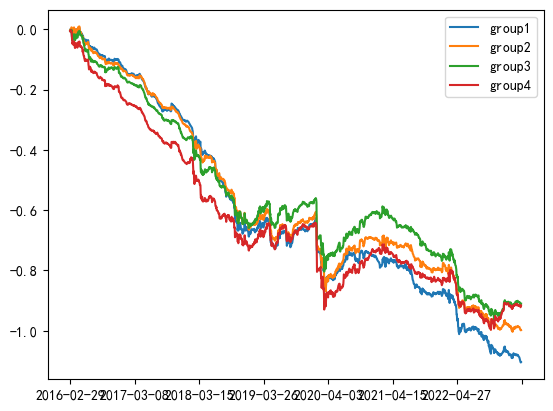

In [33]:
# 分组收益率
gr_ad = xy.cal_rate_group(
    sts_ad_mean.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.bonus_open_cl_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    group_num=4,
    masks=1
)
gr_ad.cumsum().plot()

1072.0
yoy: 0.027086827136080047 
 mdd: -0.16317491378140925 
 sharpe: 0.5576612943512671 
 rankIC: 0.024457142857142854 
 rankIR: 0.032733183442641395 
 win%: 0.5217142857142857 
 gain_loss%: -1.021864226158037


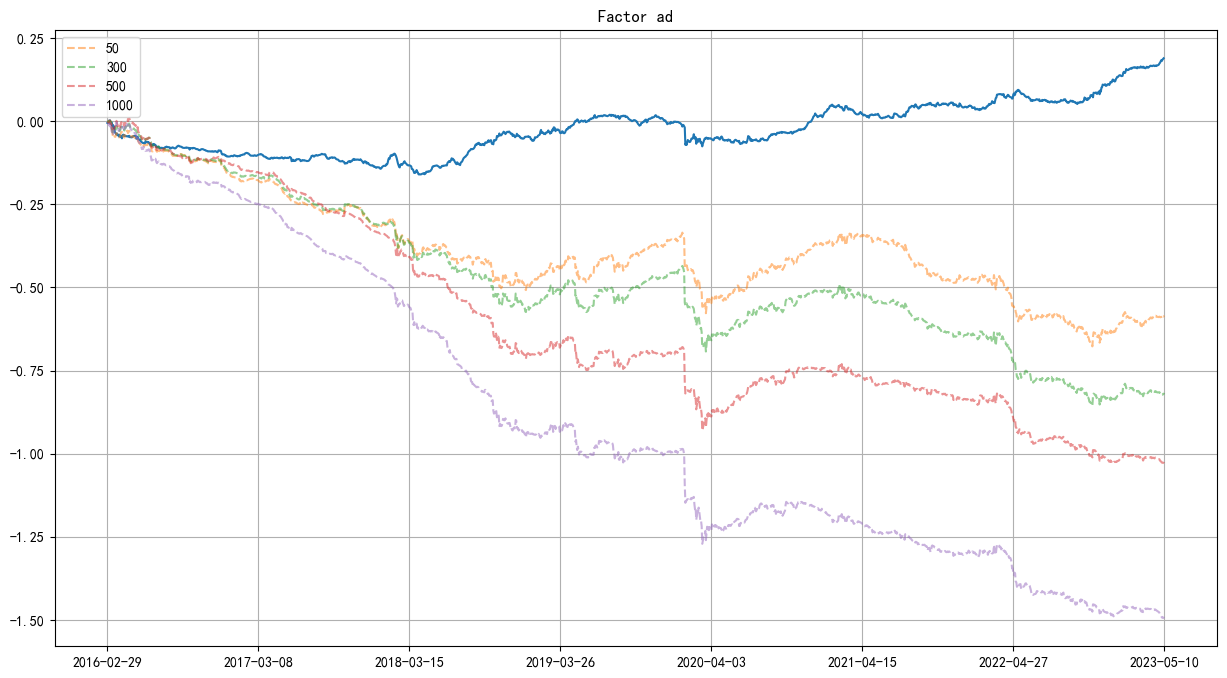

In [34]:
# 单因子强弱
ad_select, ad_rets = xy.single_Factor_backtest(
    sts_ad_mean.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.bonus_open_cl_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    _side=1,
    fee=0.000,
    name='ad'
)

0.024457142857142854

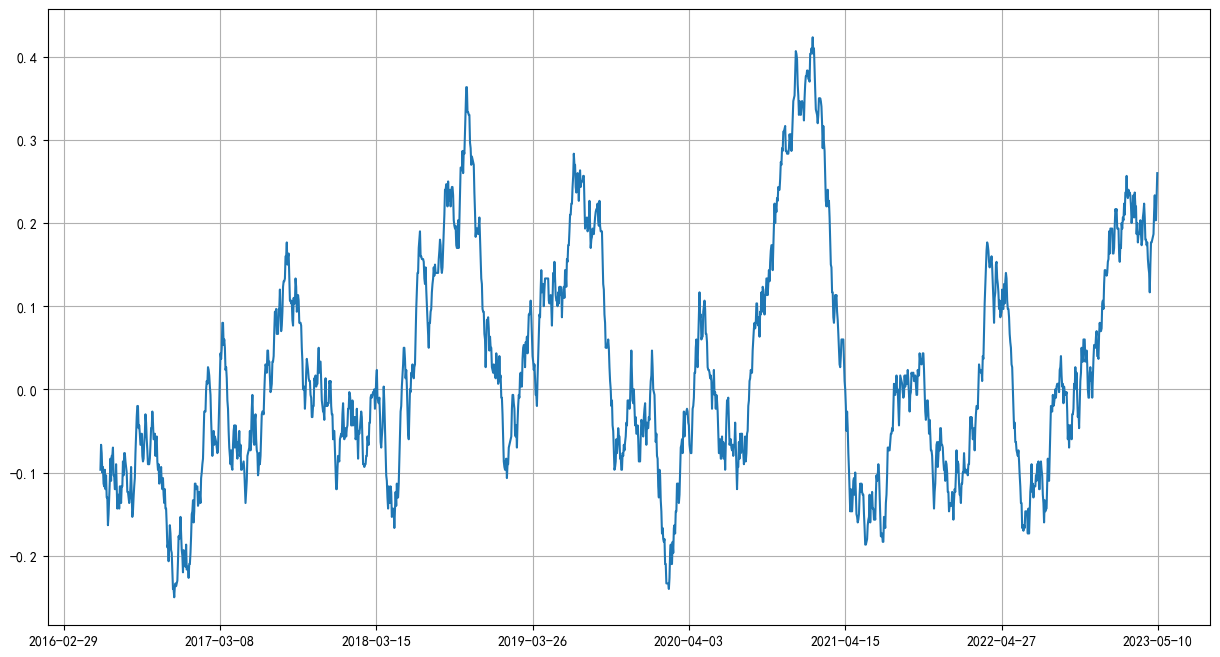

In [35]:
# 因子截面IC趋势
rankIC = xy.bonus_open_cl_rets.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False).corrwith(sts_ad_mean.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False))
rankIC.rolling(60).mean().plot(figsize=(15,8),grid=1)
rankIC.mean()

In [87]:
sts_ad_mean.to_csv(r'E:\PyProject\factors\NewFactor\st_ad2.csv')